### Задание 1

Выберите один верный ответ. “Коэффициент корреляции между количеством сна и уровнем счастья равен нулю” - это...

* 1) Нулевая гипотеза
* 2) Альтернативная гипотеза


#### __Ответ__ 

__1) Нулевая гипотеза__

Так как нулевая гипотеза это то, от чего мы отталкиваемся, поэтому там всегда будет равенство. Нулевая гипотеза – это основное проверяемое предположение, которое обычно формулируется как отсутствие различий, отсутствие влияние фактора, отсутствие эффекта, равенство нулю значений выборочных характеристик и т.п.

### Задание 2

Выберите один верный ответ. Если уровень значимости 0.10, а p-значение равно 0.7, то необходимо...

* 1)отвергнуть нулевую гипотезу
* 2)не отвергать нулевую гипотезу


#### __Ответ__

__2)не отвергать нулевую гипотезу__

p-value=0.7, уровень значимости alpha=0.10. Так как p-value больше alpha, это дает нам право не отвергать нулевую гипотезу

### Задание 3

Выберите все подходящие ответы. Что из перечисленного является 
статистической гипотезой?

* 1)  Случайная величина X имеет 
     нормальное распределение
* 2)  Среднее арифметическое 
     признака A равно 52.5
* 3)  Средний вес упаковки яблок составляет 1300 г.
* 4)  Дисперсия случайной величины X 
     не больше 5

#### __Ответ__

* 1)  Случайная величина X имеет 
     нормальное распределение
* 2)  Среднее арифметическое 
     признака A равно 52.5
* 3)  Средний вес упаковки яблок составляет 1300 г.

Статистической называют гипотезу о виде неизвестного распределения случайной величины или о числовых параметрах изучаемого признака или известного распределения.

4) Дисперсия случайной величины X не больше 5 - не подходит, потому что неизвестно, как распределена эта случайная величина. Если бы было так *Дисперсия случайной величины X не больше 5, при этом известно, что случайная величина Х распределена нормально*, тогда п 4 тоже являлся бы статистической гипотезой 


### Задание 4

Парфюмерная компания хочет узнать возраст женщин, которые являются их покупательницами. Ранее уже было изучено, что средний возраст  был 37, а среднеквадратичное отклонение равно 3.4. Размер выборки - 200 человек. Рассчитайте 95% доверительный интервал для среднего возраста. Представьте все необходимые вычисления.

#### __Ответ__

Полная формула доверительного интервала для среднего на уровне доверия 1 - alpha
$$\mu = {\bar{X} -+ z_\frac{a}{2}}{\frac{\sigma}{\sqrt{n}}} $$

In [15]:
n = 200 #случайная выборка
σ  = 3.4 #стандартное (среднеквардратичное) отклонение
X = 37 #Выборочное среднее (средний возраст женщин)
alpha = 1 - 0.95

Мы имеем право использовать формулу для доверительного интервала, если Х распределено нормально. То есть нам нужно убедиться в том, что соблюдены все допущения центральной предельной теоремы:

- Случайна ли выборка? Да.
- Достаточно ли велика выборка? Да, если n > 30

Значит, Х приблизительно нормально, и мы можем использовать формулу
И поскольку стандартное отклонение σ известно, используем распределение z (если бы не было известно, использовали бы распределение Стьюдента).

In [2]:
import math
from scipy.stats import norm

In [7]:
alpha = round(- norm.ppf((1-0.95)/2),2)
alpha

1.96

In [8]:
μ = X + alpha*(σ/n**(1/2))
μ

37.47121595898272

In [9]:
μ = X - alpha*(σ/n**(1/2))
μ

36.52878404101728

обернем вычисления в функцию

In [13]:
def confidence_interval_norm(alpha, σ, n, X):
    value = -norm.ppf(alpha / 2) * σ / math.sqrt(n)
    return X - value, X + value

In [16]:
confidence_interval_norm(alpha, σ, n, X)

(36.52879269972111, 37.47120730027889)

### Задание 5

Перед Вами данные результатов экзаменов для детей средней школы.

In [148]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
from scipy import stats
import numpy as np
%matplotlib inline

In [83]:
df=pd.read_csv('/Users/dariamishina/Documents/Pet projects/invitro/examscore.csv')

In [19]:
df

,gender,race,parenteducation,lunch,testprepcourse,mathscore,readingscore,writingscore
0,female,group A,some high school,standard,completed,78,83,85
1,female,group C,some high school,standard,none,69,71,78
2,female,group B,bachelor's degree,free/reduced,completed,58,65,71
3,female,group C,some college,standard,none,69,72,70
4,female,group C,high school,standard,none,67,72,67
...,...,...,...,...,...,...,...,...
995,male,group A,some college,standard,none,68,60,55
996,male,group C,associate's degree,free/reduced,none,76,70,66
997,male,group B,some high school,standard,completed,50,43,44
998,male,group D,some college,free/reduced,none,34,28,22


Обработайте данные на предмет пропусков и проверьте гипотезу о том, что между средними оценками по математике для мальчиков и девочек нет статистических различий. Представьте все необходимые вычисления и содержательную интерпретацию.

#### __Ответ__

In [27]:
#Рассмотрим, какие типы данных у столбцов и сколько пропусков
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   gender           1000 non-null   object
 1   race             1000 non-null   object
 2   parenteducation  1000 non-null   object
 3   lunch            1000 non-null   object
 4   testprepcourse   1000 non-null   object
 5   mathscore        1000 non-null   int64 
 6   readingscore     1000 non-null   int64 
 7   writingscore     1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [80]:
# Смотрим на пропуски
df.isnull().sum()

gender             0
race               0
parenteducation    0
lunch              0
testprepcourse     0
mathscore          0
readingscore       0
writingscore       0
dtype: int64

In [28]:
# Графики для числовых параметров
def get_gr_num(df, col, bns=10):
    fig, axes = plt.subplots(1, 1, figsize=(6, 6))
    fig.patch.set_facecolor('xkcd:white')
    sns.set(style="darkgrid")

    sns.distplot(df[col], bins=bns)
    axes.set_title(col)

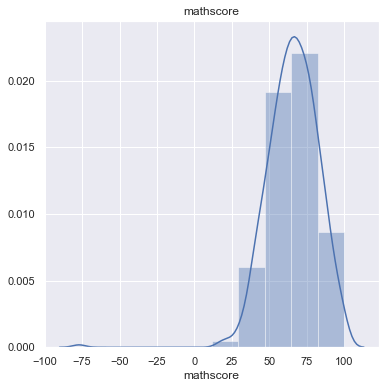

In [31]:
#посмотрим на распределение оценок по математике для всех учеников
get_gr_num(df, 'mathscore')

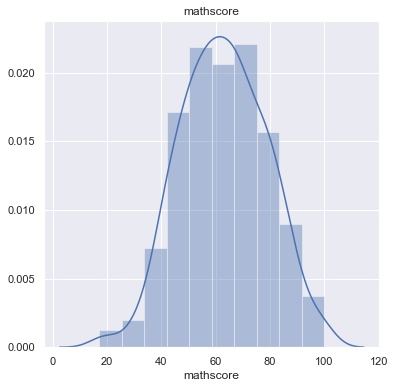

In [35]:
#посмотрим на распределение оценок по математике у девочек
get_gr_num(df[df.gender=='female'], 'mathscore')

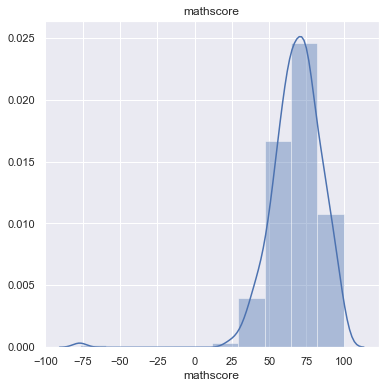

In [36]:
#посмотрим на распределение оценок по математике у мальчиков
get_gr_num(df[df.gender=='male'], 'mathscore')

странно выглядят отрицательные значения у оценок, посмотрим минимальное значение

In [38]:
df[df.gender=='male'].mathscore.min()

-77

посмотрим, сколько оценок по математике у мальчиков меньше нуля

In [84]:
df[(df.gender=='male') & (df.mathscore<0)]

,gender,race,parenteducation,lunch,testprepcourse,mathscore,readingscore,writingscore
627,male,group C,bachelor's degree,standard,none,-77,66,69
794,male,group D,high school,standard,none,-77,72,70


сделаем аналогичную проверку для девочек

In [85]:
df[(df.gender=='female') & (df.mathscore<0)]

,gender,race,parenteducation,lunch,testprepcourse,mathscore,readingscore,writingscore


У девочек по математике нет явных выбросов (значения меньше 0), нарисуем боксплот для оценок по математике для мальчиков

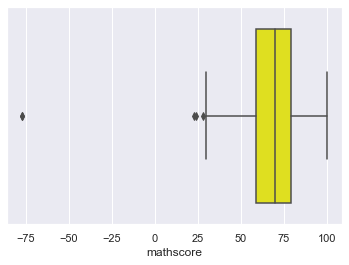

In [43]:
sns.boxplot(df[df.gender=='male'].mathscore, color='yellow');

вероятно, это опечатка, отрицательных баллов за экзамен быть не может, и за навыки чтения и письма у этих 2х учеников достаточно высокие, поэтому сделаем замену на положительные баллы

так как предполагаемые опечатки есть только в 2х случаях, сделаем замену сразу на всем датафрейме

In [87]:
df.loc[df['mathscore'] == -77, 'mathscore'] = 77

посмотрим на распределение оценок по математике для мальчиков еще раз

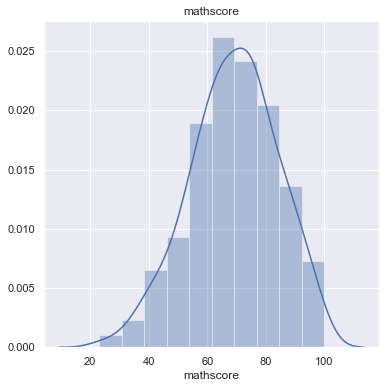

In [88]:
get_gr_num(df[df.gender=='male'], 'mathscore')

С помощью describe() выведем часть описательных статистик отдельно для мальчиков и девочек

In [50]:
df[df.gender=='female'].describe()

,mathscore,readingscore,writingscore
count,485.000000,485.000000,485.000000
mean,62.851546,71.375258,71.057732
std,15.756103,14.405986,14.943169
min,17.000000,18.000000,19.000000
25%,52.000000,61.000000,61.000000
50%,62.000000,72.000000,71.000000
75%,74.000000,82.000000,81.000000
max,100.000000,100.000000,100.000000


In [76]:
df[df.gender=='male'].describe()

,mathscore,readingscore,writingscore
count,515.000000,515.000000,515.000000
mean,69.067961,65.961165,63.477670
std,14.967450,15.853366,16.162748
min,23.000000,-99.000000,-99.000000
25%,59.000000,57.000000,55.000000
50%,70.000000,67.000000,64.000000
75%,79.000000,76.500000,74.000000
max,100.000000,100.000000,97.000000


Посчитаем дисперсию для оценок по математике для девочек и мальчиков отдельно

In [95]:
df[df.gender=='male'].mathscore.var()

224.024555173586

In [96]:
df[df.gender=='female'].mathscore.var()

248.2547754962932

__Формализуем гипотезу:__

H0: Между средними оценками по математике для мальчиков и девочек нет статистических различий. 

H1: Между средними оценками по математике для мальчиков и девочек есть статистические различия

Сравним средние двух выборок (оценки по математике для мальчиков и для девочек) с помощью T-test. Для этого нужно интерпретировать статистическое значение в двустороннем тесте с примерно нормальным распределением, что означает, что нулевая гипотеза может быть отвергнута, когда средние значения двух выборок слишком отличаются.

__Предположения__
- Наблюдения в каждой выборке независимы - нет никаких оснований предполагать, что оценки по математике у мальчиков и девочек как-то связаны
- Наблюдения в каждой выборке нормально распределены - оценки девочек распределены нормально, распределение оценок мальчиков похоже на Распределение Вейбулла, но из-за ограниченного времени предположим, что оно нормальное. (В дальнейшем для такого типа распределение будем использовать преобразование Бокса-Кокса(для признаков, значения ктр строго больше 0), преобразование Йео-Джонсона и квантильное преобразование)
- Наблюдения в каждой выборке имеют одинаковую дисперсию. Дисперсия оценок по математике для девочек равна 248,25, для мальчиков - 224,02. Сделаем допущение, что они приблизительно равны

Будем использовать функцию ttest_ind

In [97]:
ttest_ind(df[df.gender=='female'].mathscore, df[df.gender=='male'].mathscore)

Ttest_indResult(statistic=-6.398308048291554, pvalue=2.4117264505137583e-10)

В функции есть параметр equal_var, по умолчанию он равен True, то есть равные дисперсии в каждой выборке. Ранее мы сделали об этом допущение. Теперь посмотрим, как изменятся результаты T-test`а, если мы укажем значение параметра False

In [98]:
ttest_ind(df[df.gender=='female'].mathscore, df[df.gender=='male'].mathscore, equal_var = False)

Ttest_indResult(statistic=-6.388457820572276, pvalue=2.5789735371471184e-10)

В обоих случаях полученное значение p-value значительно меньше  0.05, т.е. мы отвергаем нулевую гипотезу критерия Стьюдента про равенство средних значений оценок по математике для мальчиков и девочек

Напишем функцию, которая для категориальных переменных(пол, раса и т.д.)  покажет распределение оценок по математике в зависимости от признака, а также покажет статистическую значимость этих различий.

In [69]:
def nominative_analysis(col):
    if df.loc[:, col].dtypes == np.dtype('O'): # Проверка на строковый тип данных
        print('Столбец', col)
        print('Распределение баллов по значениям признака:')
        fig, ax = plt.subplots(figsize = (14, 4))
        sns.boxplot(x=col, y='mathscore', 
                    data=df,
                   ax=ax)
        plt.xticks(rotation=45)
        ax.set_title('Boxplot for ' + col)
        plt.show()
        permutations_all = list(combinations(df.loc[:, col].dropna().unique(), 2))
        for perm in permutations_all:
            if ttest_ind(df.loc[df.loc[:, col] == perm[0], 'mathscore'].dropna(), 
                            df.loc[df.loc[:, col] == perm[1], 'mathscore'].dropna()).pvalue \
                <= 0.05/len(permutations_all): # Учли поправку Бонферони
                print('Найдены статистически значимые различия для колонки', col)
                break
        print('----------------------------------')
        print()

Столбец gender
Распределение баллов по значениям признака:


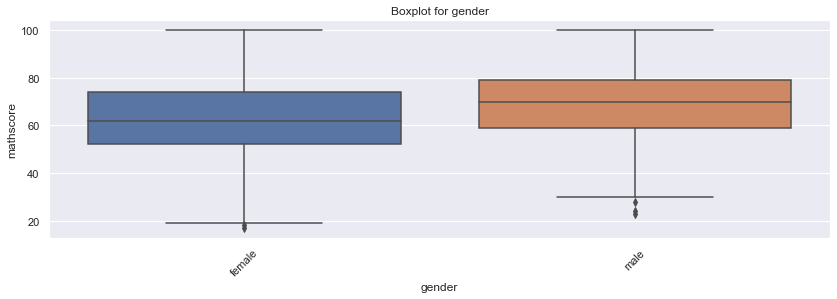

Найдены статистически значимые различия для колонки gender
----------------------------------

Столбец race
Распределение баллов по значениям признака:


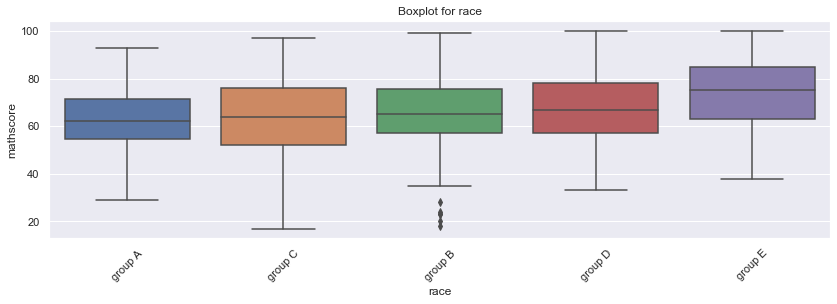

Найдены статистически значимые различия для колонки race
----------------------------------

Столбец parenteducation
Распределение баллов по значениям признака:


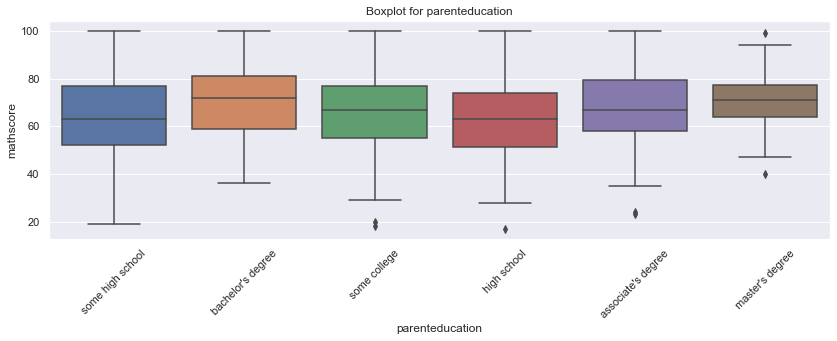

Найдены статистически значимые различия для колонки parenteducation
----------------------------------

Столбец lunch
Распределение баллов по значениям признака:


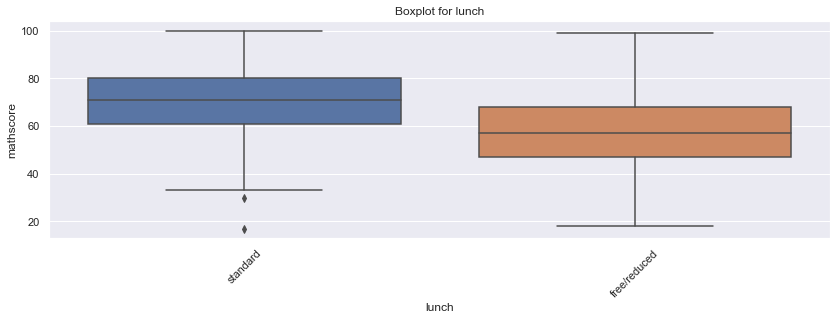

Найдены статистически значимые различия для колонки lunch
----------------------------------

Столбец testprepcourse
Распределение баллов по значениям признака:


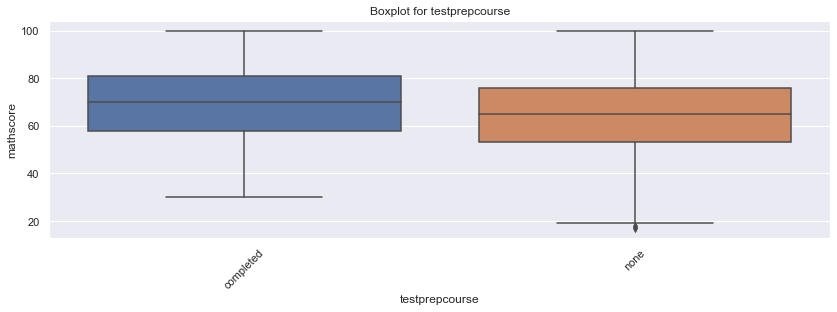

Найдены статистически значимые различия для колонки testprepcourse
----------------------------------



In [77]:
for col in df.columns:
    nominative_analysis(col)

__Вывод__

Нулевая гипотеза _Между средними оценками по математике для мальчиков и девочек нет статистических различий_ отвергается

### Задание 6

Вам предложены данные A/B теста. Проанализируйте, есть ли статистически значимая разница для конверсии в контрольной и экспериментальной группе.

Данные содержат 5 признаков:
    
* user_id - ID пользователя
* timestamp - Временная отметка
* group - К какой группе относится пользователь (контрольная или экспериментальная)
* landing_page - Какой дизайн показали пользователю {old_page, new_page}
* converted - Конверсия (0=not converted, 1=converted)

Не забудьте проверить и подготовить данные, сделать всю необходимую предобработку.

#### __Ответ__

_А/В тестирования и интерпретации его результатов не было в программе для потока DST-10, сделала задание исходя из общего понимания процесса, статей на хабре и официальной документации для библиотеки scipy_

In [99]:
dfab = pd.read_csv('/Users/dariamishina/Documents/Pet projects/invitro/ab_data.csv')

dfab.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [100]:
#Рассмотрим, какие типы данных у столбцов и сколько пропусков
dfab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


In [101]:
# Смотрим на пропуски
dfab.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

Посчитаем количество пользователей в контрольной и экспериментальной группах

In [109]:
len(dfab[dfab.group=='treatment'])

147276

In [110]:
len(dfab[dfab.group=='control'])

147202

Количество пользователей в контрольной и экспериментальной группах почти равно

In [103]:
# Функция для построения диаграммы и вывода знаничей признака
def get_gr_counts(df, col):
    print('Признак ', col)
    print()
    print(df[col].value_counts())
    print()
    print()
    df[col].value_counts(ascending=True).plot(
        kind='barh', title=col, cmap='coolwarm')

оценим, как выглядят категориальные признаки (группа, landing_page) и конверсия для всего датафрейма

Признак  converted

0    259241
1     35237
Name: converted, dtype: int64




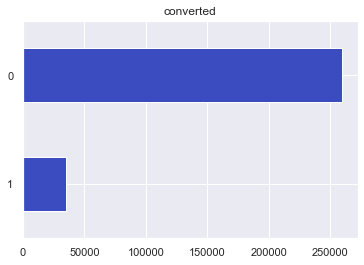

In [104]:
get_gr_counts(dfab, 'converted')

Признак  group

treatment    147276
control      147202
Name: group, dtype: int64




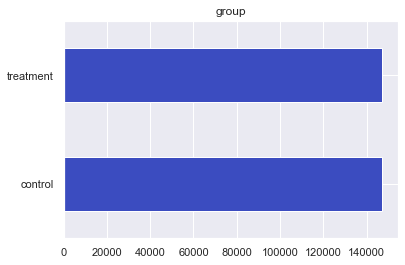

In [112]:
get_gr_counts(dfab, 'group')

Признак  landing_page

new_page    147239
old_page    147239
Name: landing_page, dtype: int64




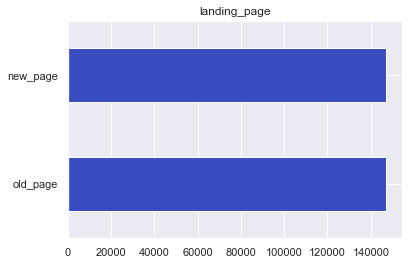

In [113]:
get_gr_counts(dfab, 'landing_page')

оценим, как выглядит конверсия для контрольной группы

Признак  converted

0    129479
1     17723
Name: converted, dtype: int64




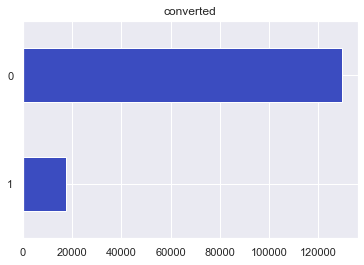

In [107]:
get_gr_counts(dfab[dfab.group=='control'], 'converted')

оценим, как выглядит конверсия для экспериментальной группы

Признак  converted

0    129762
1     17514
Name: converted, dtype: int64




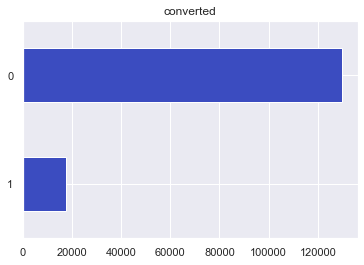

In [108]:
get_gr_counts(dfab[dfab.group=='treatment'], 'converted')

__Формализуем гипотезу:__

H0: Для конверсии в контрольной и экспериментальной группе нет статистически значимой разницы

H1: Для конверсии в контрольной и экспериментальной группе есть статистически значимая разница

У признака converted всего 2 значения, 0 и 1, то есть признак биномиальный. Для таких метрик критерий Стьюдента не подойдет, будем использовать Z-тест с двумя пропорциями для сравнения двух пропорций.

p1 - пропорция положительной конверсии для экспериментальной группа
p2 - пропорция положительной конверсии для контрольной группа
n1 - размер  экспериментальной группы
n2 - размер контрольной группы 

сделаем функцию, которая возвращает значение Z для данных p1, p2, n1 и n2

In [126]:
def z_calc(p1, p2, n1, n2):
    p_star = (p1*n1 + p2*n2) / (n1 + n2)
    return (p2 - p1) / math.sqrt(p_star*(1 - p_star)*((1.0 / n1) + (1.0 / n2)))

In [124]:
p1 = len(dfab[(dfab.group=='treatment') & (dfab.converted==1)])/len(dfab[dfab.group=='treatment'])
p2 = len(dfab[(dfab.group=='control') & (dfab.converted==1)])/len(dfab[dfab.group=='control'])
n1 = len(dfab[dfab.group=='treatment'])
n2 = len(dfab[dfab.group=='control'])

с помощью нашей функции считаем z статистику

In [145]:
z = z_calc(p1, p2, n1, n2)
z

1.2369217547321678

Считаем p-value, умножаем на Z статистику на 2, потому что альтернативная гипотеза - неравенство, у нас двухсторонний тест 

In [147]:
round(norm.cdf(z)*2,3)

1.784

__Вывод__

Так как значение P-value (1.784) больше чем уровень значимости alpha (0.05) мы не можем отвергнуть нулевую гипотезу о том, _что для конверсии в контрольной и экспериментальной группе нет статистически значимой разницы_